# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Для анализа и визуализации данных импортируем библиотеку seaborn.**

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
import seaborn as sns

**Анализируем задание. Видим, что задания 19, 20 и 21 очень похожи. Логично будет использовать функции при решении этих задач.**

**Напишим функцию** `f1_dbt_prc_srs`

Функция должна вернуть Series, где:  
 - Значения - это % заявителей, у которых были задолжности по кредитам
 - Index - это группы заявителей разбитые по условному признаку
 - Параметр функции `clmn` будет задавать название столбца в таблице `data`, где необходимо анализировать заявителей по группам
 - Округлим полученный результат до сотых с помощью `round()`
 - В случае, если у группы заявителей не будет задолжностей по кредитам (придется 0 делить на число, вернется `'NaN'`), заменим пустое значение в строке на 0 с помощью `.fillna()`
 - Используем `try-except` для поиска возможных ошибок

In [23]:
def f1_dbt_prc_srs(clmn):
    try:
        result = round((100 / data[clmn].value_counts() * data.loc[(data['debt'] == 1), clmn].value_counts()).fillna(0),2)
    except:
        result = 'Error f1'
    return result

**Напишим функцию** `f2_dbt_cnt_srs`

Функция должна вернуть Series, где:  
 - Значения - это % заявителей группы от общего количества заявителей
 - Index - это группы заявителей разбитые по условному признаку
 - Параметр функции `clmn` будет задавать название столбца в таблице `data`, где необходимо анализировать заявителей по группам
 - Округлим полученный результат до сотых с помощью `round()`
 - Используем `try-except` для поиска возможных ошибок

In [24]:
def f2_dbt_cnt_srs(clmn):
    try:
        result = round(100 / data[clmn].value_counts().sum() * data[clmn].value_counts(),2)
    except:
        result = 'Error f2'
    return result

**Напишим функцию** `f3_dbt_chrt_y`

Функция должна вернуть список значений переменной Y для построения граффика, где:
 - Параметр функции `clmn` будет задавать название столбца в таблице `data`, где необходимо анализировать заявителей по группам
 - Округлим полученный результат до сотых с помощью `round()`
 - Преобразуем Series в List с помощью `.tolist()`
 - Первым значением поставим средний % заявителей, имеющих задолжности по кредитам
 - Используем `try-except` для поиска возможных ошибок

In [25]:
def f3_dbt_chrt_y(clmn):
    try:
        result = round(100 / data['debt'].value_counts().sum() * data.loc[(data['debt'] == 1), 'debt'].value_counts(),2).tolist() + round((100 / data[clmn].value_counts() * data.loc[(data['debt'] == 1), clmn].value_counts()).fillna(0),2).tolist()
    except:
        result = 'Error f3'
    return result

**Напишим функцию** `f4_dbt_chrt_x`

Функция должна вернуть список значений переменной X для построения граффика, где:
 - Параметр функции `clmn` будет задавать название столбца в таблице `data`, где необходимо анализировать заявителей по группам
 - Округлим полученный результат до сотых с помощью `round()`
 - Преобразуем Series в List с помощью `.tolist()`
 - Индексы Series найдем с помощью `.index`
 - Первым значением поставим `'средний % должников'`
 - Используем `try-except` для поиска возможных ошибок

In [26]:
def f4_dbt_chrt_x(clmn):
    try:
        c = ['средний % должников']
        result = c + round((100 / data[clmn].value_counts() * data.loc[(data['debt'] == 1), clmn].value_counts()).fillna(0),2).index.tolist()
    except:
        result = 'Error f4'
    return result

In [27]:
def f5_dbt_chrt(clmn):
    try:
        c = ['средний % должников']
        chrt_x = c + round((100 / data[clmn].value_counts() * data.loc[(data['debt'] == 1), clmn].value_counts()).fillna(0),2).index.tolist()
        chrt_y = round(100 / data['debt'].value_counts().sum() * data.loc[(data['debt'] == 1), 'debt'].value_counts(),2).tolist() + round((100 / data[clmn].value_counts() * data.loc[(data['debt'] == 1), clmn].value_counts()).fillna(0),2).tolist()
        chrt = {'количество детей' : chrt_x, '% заявок с задолжностями' : chrt_y}
        result = pd.DataFrame(chrt) 
    except:
        result = 'Error f5'
    return result

In [28]:
q1 = f5_dbt_chrt('children')
q1

,количество детей,% заявок с задолжностями
0,средний % должников,8.12
1,0,7.54
2,1,9.23
3,2,9.45
4,3,8.18
5,4,9.76
6,5,0.00


In [29]:
print(q1)

      количество детей  % заявок с задолжностями
0  средний % должников                      8.12
1                    0                      7.54
2                    1                      9.23
3                    2                      9.45
4                    3                      8.18
5                    4                      9.76
6                    5                      0.00


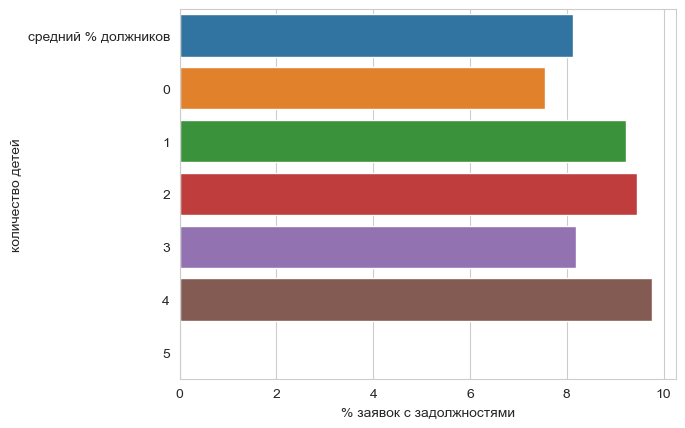

In [30]:
sns.set_style('whitegrid')
ax = sns.barplot(y='количество детей', x='% заявок с задолжностями', data = q1 )

**Проанализируем общую зависимость возврата кредита в выборке, не зависимо от количества детей заявителей.**

In [31]:
    # находим % заявителей, которые не вернули кредит. Округлим до 2-ого знака после запятой.
print(round(100 / data['debt'].value_counts().sum() * data.loc[(data['debt'] == 1), 'debt'].value_counts(),2).tolist())

[8.12]


<Axes: xlabel='count', ylabel='debt'>

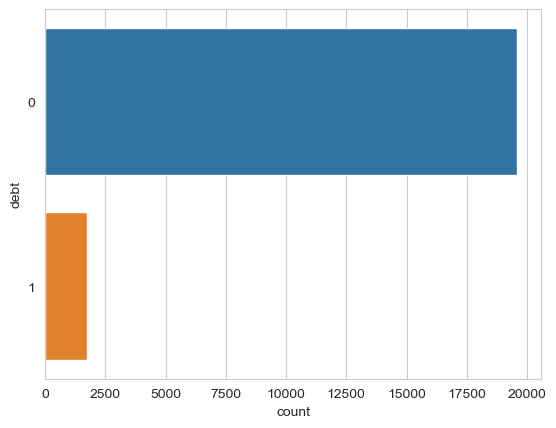

In [32]:
    # визуализируем результат
sns.set_style('whitegrid')
sns.countplot(y = data['debt'])

*8.12% заявителей имели задолжности по возврату кредита.*

**Проанализируем количественное распределение значений столбца `'children'` от общего количества заявок по количеству детей у заявителей. Используем функцию** `f2_dbt_cnt_srs`

In [33]:
    # вернем Series со значениями:
    # количество детей       % заявок в группе от общего количества заявок
f2_dbt_cnt_srs('children')

0    66.06
1    22.54
2     9.62
3     1.55
4     0.19
5     0.04
Name: children, dtype: float64

<Axes: xlabel='count', ylabel='children'>

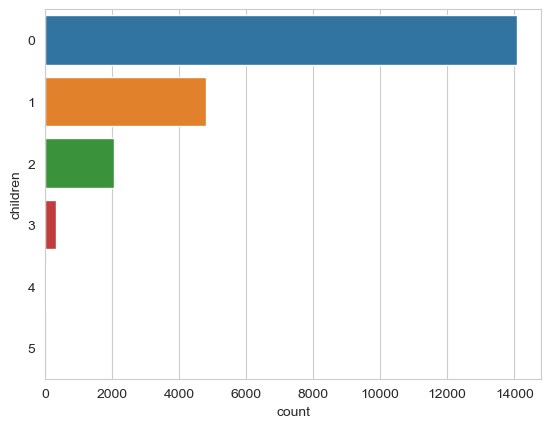

In [34]:
    # визуализируем результат
sns.set_style('whitegrid')
sns.countplot(y = data['children'])

*Мы видим, что количество значений в столбце `'children'` **заявителей с 4-мя и 5-ю детьми менее 1%** от общего количества значений в выборке. Это ставит под сомнение правильность выводов при анализе данных столбца `'children'` заявителей с 4-мя и 5-ю детьми. Будем иметь это ввиду при дальнейшем анализе.*

**Оценим процентное распределение значений столбца `'children'` от общего количества заявок по количеству детей у заявителей. Используем функцию** `f1_dbt_prc_srs`

In [35]:
    # вернем Series со значениями:
    # количество детей       % заявок с задолжностями в каждой группе
f1_dbt_prc_srs('children')

0    7.54
1    9.23
2    9.45
3    8.18
4    9.76
5    0.00
Name: children, dtype: float64

**Визуализируем результат, с помощью столбчатой диаграммы. Используем функции** `f3_dbt_chrt_x` **и** `f4_dbt_chrt_y`

 - по оси Y - заявки, разбитые на группы по количетсву детей у заявителя.
 - по оси X - количественное значение в %
 - средний процент должников из всех заявителей представлена в верхнем столбце.

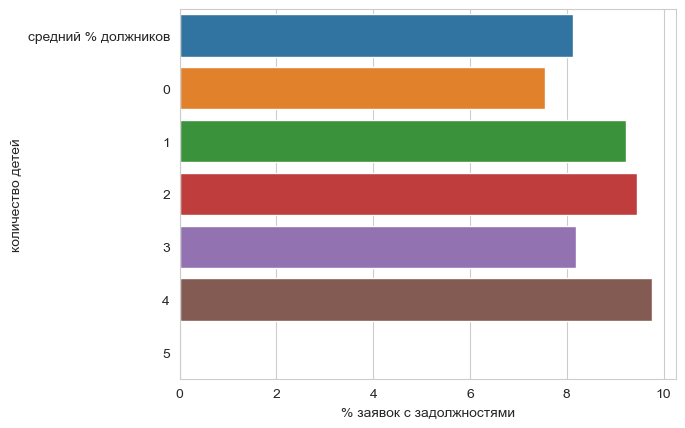

In [36]:
chrt_y = f3_dbt_chrt_y('children')
chrt_x = f4_dbt_chrt_x('children')
grf = pd.DataFrame({'количество детей' : chrt_x, '% заявок с задолжностями' : chrt_y})
sns.set_style('whitegrid')
ax = sns.barplot(y='количество детей', x='% заявок с задолжностями', data = grf )

**Вывод:** 
1. Мы видим аномальное значение в группе заявок от людей с 5-ю детьми, там все выплачивали кредиты вовремя. Скорее всего это может быть связано с очень маленькой выборкой для данной группы заявителей, как мы отметили ранее.
2. В целом мы не видим какой-то явной закономерности в задолжностях по кредитам в зависимости от количества детей заявителя, но **заявители без детей чуть более (~1-2%) склонны выплачивать кредит без задолжностей**, чем люди с детьми.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Проанализируем заявителей по семейному положению, посмотрим на количество заявок. Используем функцию** `f2_dbt_cnt_srs`

In [37]:
    # вернем Series со значениями:
    # семейное положение       % заявок в группе от общего количества заявок
f2_dbt_cnt_srs('family_status')

женат / замужем          57.48
гражданский брак         19.38
Не женат / не замужем    13.11
в разводе                 5.57
вдовец / вдова            4.46
Name: family_status, dtype: float64

<Axes: xlabel='count', ylabel='family_status'>

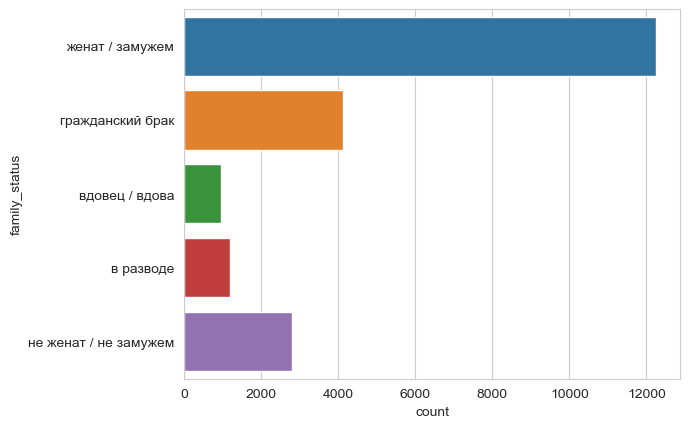

In [38]:
    # приведем все значения столбца family_status к нижнему регистру и визуализируем данные
data['family_status'] = data['family_status'].str.lower()
sns.set_style('whitegrid')
sns.countplot(y = data['family_status'])

*Выборка достаточная для дальнейшего анализа.*

**Мы уже знаем, что 8.12% заявителей имели задолжности по возврату кредитов. Теперь оценим сколько % заявителей в каждой группе (по семейному положению) имели задолжности по кредитам. Используем функцию** `f1_dbt_prc_srs`

In [39]:
    # вернем Series со значениями:
    # семейное положение       % заявок с задолжностями в каждой группе
f1_dbt_prc_srs('family_status')

женат / замужем          7.56
гражданский брак         9.31
не женат / не замужем    9.76
в разводе                7.06
вдовец / вдова           6.62
Name: family_status, dtype: float64

**Визуализируем результат, с помощью столбчатой диаграммы. Используем функции** `f3_dbt_chrt_x` **и** `f4_dbt_chrt_y`

 - по оси Y - заявки, разбитые на группы по семейному положению.
 - по оси X - количественное значение в %
 - средний процент должников из всех заявителей представлена в верхнем столбце.

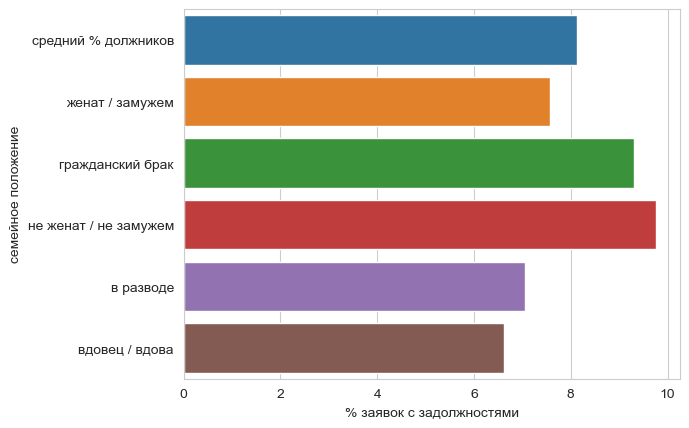

In [40]:
chrt_y = f3_dbt_chrt_y('family_status')
chrt_x = f4_dbt_chrt_x('family_status')
grf = pd.DataFrame({'семейное положение' : chrt_x, '% заявок с задолжностями' : chrt_y})
sns.set_style('whitegrid')
ax = sns.barplot(y='семейное положение', x='% заявок с задолжностями', data = grf )

**Вывод:** 
1. На графике хорошо видна закономерность: **люди не состоящие в браке или состоящие в гражданском браке более склонны к задолжностям по кредиту, чем женатые/разведенные люди или вдовцы.**
2. Возможно это связано с возрастом заемщиков. Можно выдвинуть гипотезу, что средние значения возроста заемщиков не состоящих в браке или гражданском браке ниже, чем средние значениям возроста женатых/разведенных или вдовцов. Обобщим гипотезу: **чем моложе средний возраст заемщика, тем выше процент задолжности по кредиту.** Давайте попробуем проверить эту гипотезу.

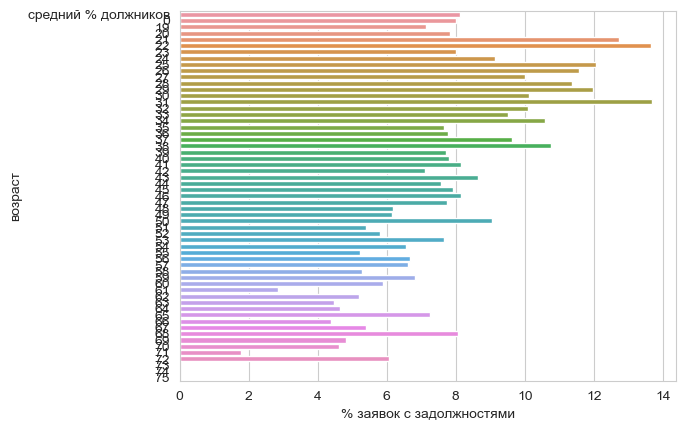

In [41]:
chrt_y = f3_dbt_chrt_y('dob_years')
chrt_x = f4_dbt_chrt_x('dob_years')
grf = pd.DataFrame({'возраст' : chrt_x, '% заявок с задолжностями' : chrt_y})
sns.set_style('whitegrid')
ax = sns.barplot(y='возраст', x='% заявок с задолжностями', data = grf )

*Можно еще обработать данные, убрать строки, где заемщик указал нулевой возраст, убрать строки, где недостаточно значений данных для анализа, попробовать сгладить "пики" аппроксимацией, разбить на возростные группы. Но даже сейчас можно сказать, что* ***выдвинутая гипотеза верна, с возростом люди менее склонны к задолжностям по кредитам***

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Так как уровень дохода у каждого заемщика разный, то нам пригодятся категории, которые мы присвоили заемщикам в задании 16. По этим категориям и будем анализировать зависимость. Посмотрим на количетсво заявок в каждой категории. Используем функцию** `f2_dbt_cnt_srs`

In [42]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
    # вернем Series со значениями:
    # категория дохода       % заявок в группе от общего количества заявок
f2_dbt_cnt_srs('total_income_category')

C    74.64
B    23.51
D     1.64
A     0.12
E     0.10
Name: total_income_category, dtype: float64

<Axes: xlabel='count', ylabel='total_income_category'>

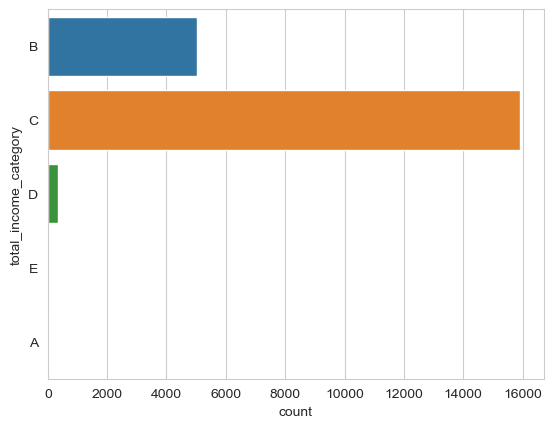

In [43]:
    # визуализируем данные
sns.set_style('whitegrid')
sns.countplot(y = data['total_income_category'])

*В категориях* ***`'A'` и `'E'` менее 1% значений, этого может быть недостаточно для анализа.***

**Мы уже знаем, что 8.12% заявителей имели задолжности по возврату кредитов. Теперь оценим сколько % заявителей в каждой категории (по уровню дохода) имели задолжности по кредитам. Используем функцию** `f1_dbt_prc_srs`

In [44]:
    # вернем Series со значениями:
    # категория дохода       % заявок с задолжностями в каждой группе
f1_dbt_prc_srs('total_income_category')

A    8.00
B    7.06
C    8.50
D    6.02
E    9.09
Name: total_income_category, dtype: float64

**Визуализируем результат, с помощью столбчатой диаграммы. Используем функции** `f3_dbt_chrt_x` **и** `f4_dbt_chrt_y`

 - по оси Y - заявки, разбитые на группы по уровню дохода.
 - по оси X - количественное значение в %
 - средний процент должников из всех заявителей представлена в верхнем столбце.

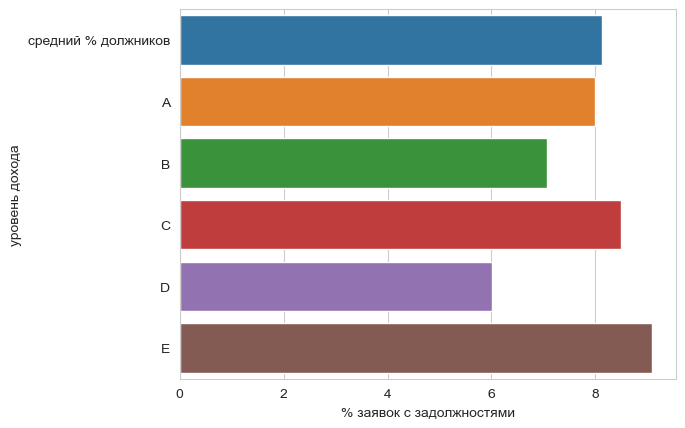

In [45]:
chrt_y = f3_dbt_chrt_y('total_income_category')
chrt_x = f4_dbt_chrt_x('total_income_category')
grf = pd.DataFrame({'уровень дохода' : chrt_x, '% заявок с задолжностями' : chrt_y})
sns.set_style('whitegrid')
ax = sns.barplot(y='уровень дохода', x='% заявок с задолжностями', data = grf )

**Вывод:** 
1. Явных закономерностей не видно, можно только сказать, что **у заемщиков с доходом из категории 'D' (от 30001 до 50000) наименьший процент людей с задолжностями по кредитам.**

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Так как заемщики заполняли графу 'цель получения кредита' в свободной форме, то нам пришлось структурировать данные в задании 18 по присвоенным категориям и будем анализировать зависимость. Посмотрим на количетсво заявок в каждой категории. Используем функцию** `f2_dbt_cnt_srs`

In [46]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
    # вернем Series со значениями:
    # категория дохода       % заявок в группе от общего количества заявок
f2_dbt_cnt_srs('purpose_category')

операции с недвижимостью    50.40
операции с автомобилем      20.06
получение образования       18.70
проведение свадьбы          10.84
Name: purpose_category, dtype: float64

*Выборка достаточная для дальнейшего анализа.*

**Мы уже знаем, что 8.12% заявителей имели задолжности по возврату кредитов. Теперь оценим сколько % заявителей в каждой группе (по цели кредита) имели задолжности по кредитам. Используем функцию** `f1_dbt_prc_srs`

In [47]:
    # вернем Series со значениями:
    # цель кредита       % заявок с задолжностями в каждой группе
f1_dbt_prc_srs('purpose_category')

операции с недвижимостью    7.26
операции с автомобилем      9.35
получение образования       9.25
проведение свадьбы          7.91
Name: purpose_category, dtype: float64

**Визуализируем результат, с помощью столбчатой диаграммы. Используем функции** `f3_dbt_chrt_x` **и** `f4_dbt_chrt_y`

 - по оси Y - заявки, разбитые на группы по цели кредита.
 - по оси X - количественное значение в %
 - средний процент должников из всех заявителей представлена в верхнем столбце.

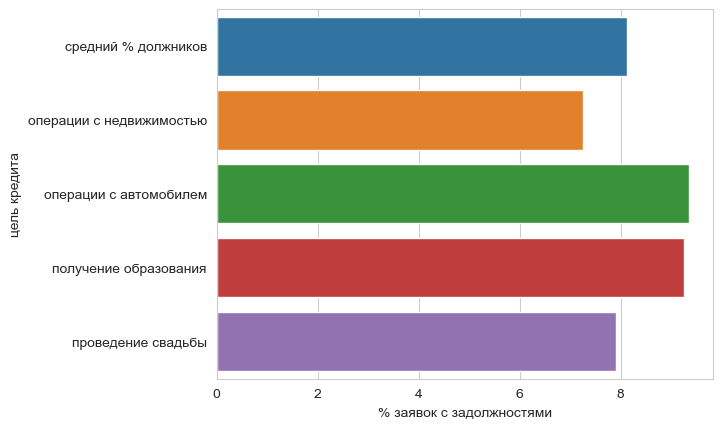

In [48]:
chrt_y = f3_dbt_chrt_y('purpose_category')
chrt_x = f4_dbt_chrt_x('purpose_category')
grf = pd.DataFrame({'цель кредита' : chrt_x, '% заявок с задолжностями' : chrt_y})
sns.set_style('whitegrid')
ax = sns.barplot(y='цель кредита', x='% заявок с задолжностями', data = grf )

**Вывод:** 
1. Заемщики, берущие кредит на Операции с недвижимостью и Проведение свадьбы, имеют меньшее количество просроченных задолжностей, чем заемщики берущие кредиты на Операции с автомобилем и Получение образования.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Трудно назвать причину пропусков. Видим только одну закономерность: пропуски появляются сразу в 2-х столбцах одной строки (`'days_employed'` и `'total_income'`). Я склонен предположить, что **пропуски полностью случайные**.

In [50]:
try:
    data_start = pd.read_csv('/datasets/data.csv')
except:
    data_start = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

(data_start.loc[(data_start['total_income'].isna() == True)]).head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Когда в выборке присутствуют аномально высокие или низкие значения, лучше использовать медианные значения. Они окажут меньшее влияние на выборку в целом, чем при использовании среднее арифметического.

### Шаг 4: общий вывод.

Итак кредитный отдел банка попросил разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.  
Мы проанализировали 4 зависимости в 4-х заданиях и можем смело сказать, что на факт погашения кредита в срок влияет очень много разных факторов.   Например, на основании 4-х исследований, можно составить портрет заемщика, у которого был бы наименьший % просрочки кредита: *это человек преклонного возраста, без детей, вдовец (или вдова), с доходом из категории 'D' (от 30001 до 50000), который хочет взять кредит с целью провести операции с недвижимостью.*

*Забавный факт: самый старый заемщик (75 лет) в графе цель получения кредита указал: заняться образованием. Вывод напрашивается сам - учиться никогда не позно.*

<hr>
<div style="border:solid 2px; padding: 20px; color:#4b7e80">
<span style="color:#4b7e80">Итак новая задачу: надо решить кейс используя методы pivot_table или groupby().<br><br>
Хочу отметить, что тренажер по какой-то неведомой мне причине отправил не финальную версию на ревью. Возможно, он отправил последнюю точку сохранения или проблема в кроссбраузерности. Суть дела это не меняет, в финальной версии я подправил орфографию и пришел к тому, что функция должна быть одна и должна возвращать "технический/сервисный/сводный" массив (как раз на этой стадии, где я начал собирать 4 функции в один массив, проект и ушел на ревью). А дальше уже надо строить всю аналитику, выводы и визуализацию, оперируя столбцами этого датафрейма. В любом случае методов pivot_table или groupby() там нет, есть просто математика, которая делает тоже самое. Использовать методы pivot_table или groupby() проще, быстрее и понятнее.<br><br>
В целом, я понимал, что писать такую функцию не самый оптимальный вариант расхода ресурсов. А разбираться в этой "писанине" - это вообще самая неблагодарная работа. Всегда проще написать свое решение, чем разбираться в таких функциях. Я похоже просто что-то где-то пропустил в теории и решил, что буду делать кейс через эту функцию.<br><br>
Логика моего решения была в том, чтобы сделать универсальную функцию не для конкретного датафрейма, а для любого датафрейма нужного формата. Чтобы можно было взять любой датафрейм, сделать предобработку, применить функцию и на выходе получить читабельный результат для анализа. Постараться максимально автоматизировать процесс.<br><br>
Попробуем реализовать тоже самое пользуясь методом pivot_table. В качестве примера разберем зависимость между возрастом заявителя и возвратом кредита в срок.</span></div>

<b>Импортируем библиотеку numpy.</b>

In [51]:
import numpy as np

**Напишем функцию `'f5_df'`.**

Функция должна вернуть ДатаФрейм `'df'`, где:
   - Параметр функции `'clmn'` будет задавать название столбца в таблице `'data'`, где необходимо анализировать заявителей по группам
   - Значения в столбце `'mean'` - это % заявителей, у которых были задолженности по кредитам
   - Значения в столбце `'len'` - количество заявителей
   - Index - это группы заявителей разбитые по условному признаку столбца `'clmn'`
   - Используем `'try-except'` для поиска возможных ошибок

Для построения ДатаФрейма `'df'` воспользуемся методом `'pivot_table'` и функциями `'np.mean'` и `'len'`.

In [52]:
def f5_df(clmn):
    try:
        df = []
        df = pd.pivot_table(
            data, 
            index = [clmn],
            values = ['debt'],
            aggfunc = [np.mean, len]
            )
        result = df
    except:
        result = 'Error f5'
    return result

**Применим функцию `'f5_df'` с параметром `'dob_years'`.**

In [53]:
df = f5_df('dob_years')
df

,mean,len
,debt,debt
dob_years,,
0,0.080000,100
19,0.071429,14
20,0.078431,51
21,0.127273,110
22,0.136612,183
23,0.080000,250
24,0.091255,263
25,0.120787,356


**Визуализируем результат с помощью линейного графика lineplot.**

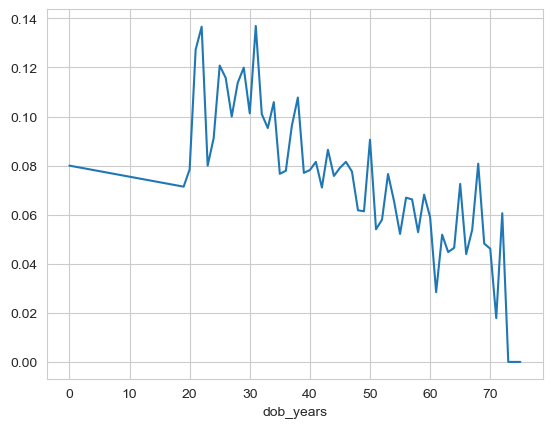

In [54]:
sns.set_style('whitegrid')
ax = sns.lineplot(x = df.index , y = df['mean', 'debt'].tolist())

**Попробуем улучшить результат избавившись от тех строк в ДатаФрейме `'df'`, где количество значений менее 1% от всей выборки.**<br>
*Отдельно стоит отметить, что 100 человек при заполнении анкеты указали "0" в графе возраст. Их мы тоже удалим (отдельно код под них можно не писать, они подпадают под условие <1%).*

In [55]:
df = df.loc[(df['len', 'debt'] >= (data['debt'].count()/100))]
df

,mean,len
,debt,debt
dob_years,,
23,0.080000,250
24,0.091255,263
25,0.120787,356
26,0.115764,406
27,0.100000,490
28,0.113772,501
29,0.119926,542
30,0.101313,533


**Визуализируем результат.**

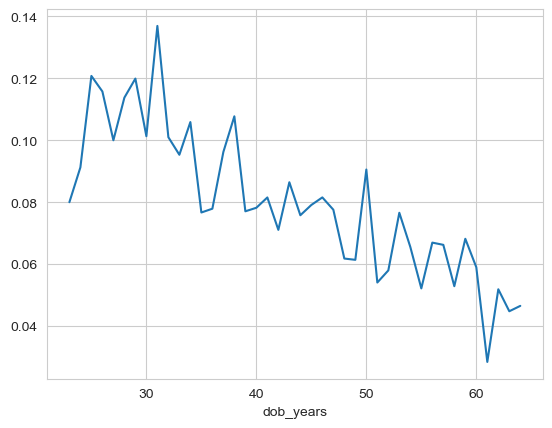

In [56]:
sns.set_style('whitegrid')
ax = sns.lineplot(x = df.index , y = df['mean', 'debt'].tolist())

**Вывод:** <br>
    1. Мы видим, что график не равномерный, но общий тренд прослеживается. Скорее всего это из-за высоких значений погрешности, вызванной недостаточным количеством данных для анализа.<br>
    2. Мы видим зависимость между возрастом заявителя и возвратом кредита в срок - чем старше заявитель, тем выше вероятность, что заявитель вернет кредит в срок.

**Используем функцию и посмотрим кто больше склонен к просрочкам кредита мужчины или женщины.**<br>
*Пропустим все промежуточные шаги и сразу визуализируем результат.*

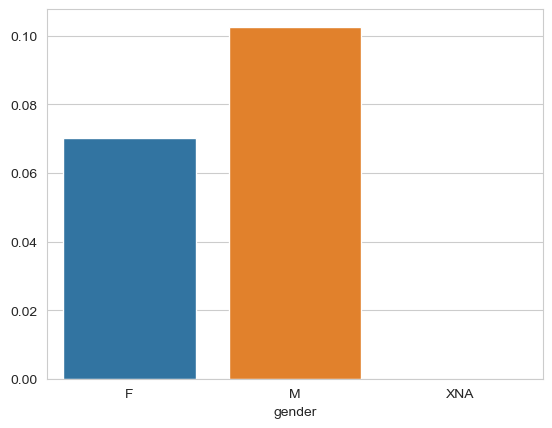

In [57]:
df = f5_df('gender')
sns.set_style('whitegrid')
ax = sns.barplot(x = df.index , y = df['mean', 'debt'].tolist())

**Вывод:** <br>
    1. Кто-то не смог определиться со своим полом.<br>
    2. У мужчин доля просрочек по кредитам выше.

### Шаг 4.1: общий вывод.

Итак кредитный отдел банка попросил разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.<br>
Мы написали универсальную функцию, с помощью которой можно анализировать исходный ДатаФрейм по любым признакам, проанализировали 4 зависимости в 4-х заданиях и можем смело сказать, что на факт погашения кредита в срок влияет очень много разных факторов.<br>
Например, на основании 4-х исследований, можно составить портрет заемщика, у которого был бы наименьший % просрочки кредита: *это женщина преклонного возраста, без детей, вдова, с доходом из категории 'D' (от 30001 до 50000), которая хочет взять кредит с целью провести операции с недвижимостью.*<br>
По аналогии составим портрет высоко рискованного заемщика: *это женатый молодой человек с 4-мя детьми, с доходом из категории 'E' (до 30000), который хочет взять кредит с целью операций с автомобилем.*<br>
С целью уменьшения погрешностей и более качественного анализа данных, предлагаю кредитному отделу предоставлять больший объем анкет пользователей.